# <p style="background-color:purple;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bagging & Boosting Methods Capstone Project (Titanic Prediction)</b></p>

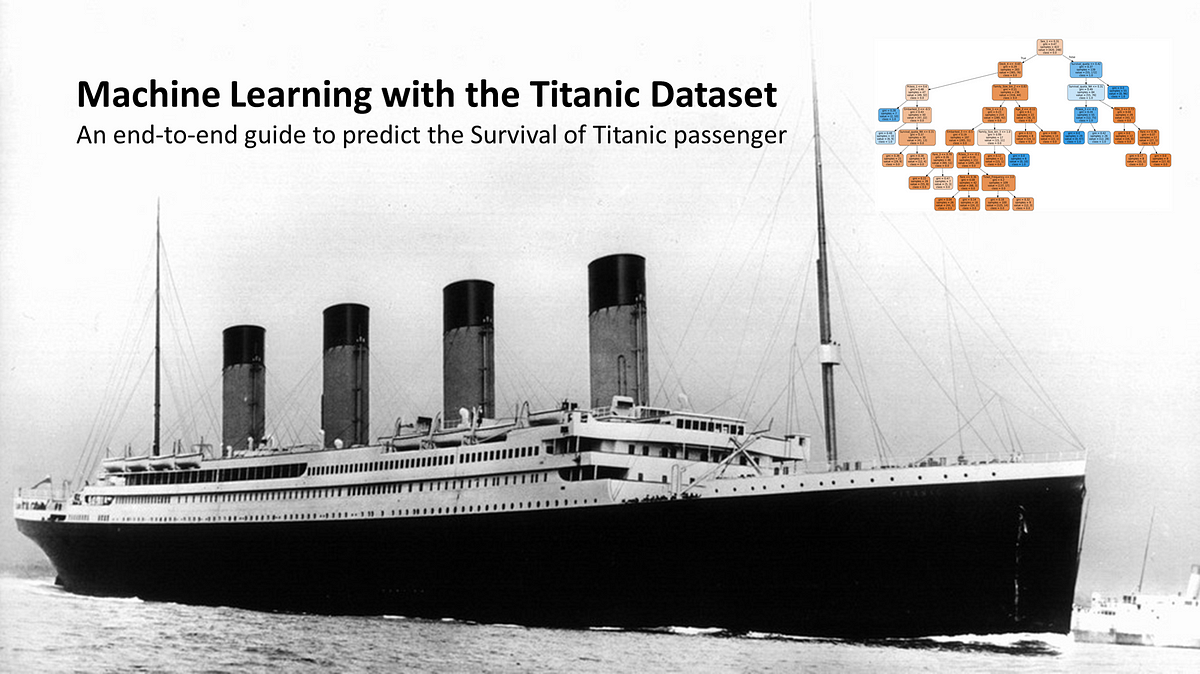

## ---------------------------- Titanic - Machine Learning from Disaster-----------------------------

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score, classification_report,confusion_matrix
from sklearn.metrics import  recall_score, precision_score, roc_auc_score, auc
#from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from yellowbrick.classifier import ClassPredictionError, ROCAUC
from sklearn.pipeline  import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from xgboost import XGBClassifier


plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Read Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S

In [4]:
train.sample(5)

PassengerId  Survived  Pclass                       Name     Sex   Age  SibSp  Parch         Ticket      Fare Cabin Embarked
16            17         0       3       Rice, Master. Eugene    male   2.0      4      1         382652   29.1250   NaN        Q
409          410         0       3         Lefebre, Miss. Ida  female   NaN      3      1           4133   25.4667   NaN        S
826          827         0       3               Lam, Mr. Len    male   NaN      0      0           1601   56.4958   NaN        S
393          394         1       1     Newell, Miss. Marjorie  female  23.0      1      0          35273  113.2750   D36        C
361          362         0       2  del Carlo, Mr. Sebastiano    male  29.0      1      0  SC/PARIS 2167   27.7208   NaN        C

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
df=train.copy()

In [8]:
df.shape

(891, 12)

In [9]:
df.describe().T

count        mean         std   min       25%       50%    75%       max
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5  891.0000
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0    1.0000
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0    3.0000
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   80.0000
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0    8.0000
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0    6.0000
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0  512.3292

In [10]:
df.describe(include="all").T

count unique                      top freq       mean         std   min     25%      50%    75%       max
PassengerId  891.0    NaN                      NaN  NaN      446.0  257.353842   1.0   223.5    446.0  668.5     891.0
Survived     891.0    NaN                      NaN  NaN   0.383838    0.486592   0.0     0.0      0.0    1.0       1.0
Pclass       891.0    NaN                      NaN  NaN   2.308642    0.836071   1.0     2.0      3.0    3.0       3.0
Name           891    891  Braund, Mr. Owen Harris    1        NaN         NaN   NaN     NaN      NaN    NaN       NaN
Sex            891      2                     male  577        NaN         NaN   NaN     NaN      NaN    NaN       NaN
Age          714.0    NaN                      NaN  NaN  29.699118   14.526497  0.42  20.125     28.0   38.0      80.0
SibSp        891.0    NaN                      NaN  NaN   0.523008    1.102743   0.0     0.0      0.0    1.0       8.0
Parch        891.0    NaN                      NaN  NaN   0.381594    0.806057   0.0     0.0      0.0    0.0       6.0
Ticket         891    681                   347082    7        NaN         NaN   NaN     NaN      NaN    NaN       NaN
Fare         891.0    NaN                      NaN  NaN  32.204208   49.693429   0.0  7.9104  14.4542   31.0  512.3292
Cabin          204    147                  B96 B98    4        NaN         NaN   NaN     NaN      NaN    NaN       NaN
Embarked       889      3                        S  644        NaN         NaN   NaN     NaN      NaN    NaN       NaN

In [11]:
df.describe(include=[object]).T

count unique                      top freq
Name       891    891  Braund, Mr. Owen Harris    1
Sex        891      2                     male  577
Ticket     891    681                   347082    7
Cabin      204    147                  B96 B98    4
Embarked   889      3                        S  644

In [12]:
def is_hashable(v):
    try:
        hash(v)
    except TypeError:
        return False
    return True

def column_analysis(df):
    for column in df.columns:
        if all(df[column].apply(is_hashable)):
            unique_values = df[column].unique()
        else:
            unique_values = df[column].astype(str).unique()
            
        unique_count = len(unique_values)
        
        print(f"\033[1m\033[91mColumn:\033[0m \033[1m\033[94m{column}\033[0m")
        print(f"\033[1m\033[92mNumber of Unique Values:\033[93m {unique_count}")
        if unique_count <= 10:
            print(f"\033[1mUnique Values:\033[0m {unique_values}\n")
        else:
            print(f"\033[95mFirst 10 Unique Values:\033[0m {unique_values[:10]}")
            print(f"... and {unique_count - 10} more unique values\n")
        missing_count = df[column].isnull().sum()
        missing_percentage = (missing_count / len(df)) * 100
        print(f"\033[1mThe number of NaN values:\033[0m {missing_count}")
        print(f"\033[1mPercentage of NaN values:\033[0m {missing_percentage:.2f}%\n")
        
column_analysis(df)
    
      

Column: PassengerId
Number of Unique Values: 891
First 10 Unique Values: [ 1  2  3  4  5  6  7  8  9 10]
... and 881 more unique values

The number of NaN values: 0
Percentage of NaN values: 0.00%

Column: Survived
Number of Unique Values: 2
Unique Values: [0 1]

The number of NaN values: 0
Percentage of NaN values: 0.00%

Column: Pclass
Number of Unique Values: 3
Unique Values: [3 1 2]

The number of NaN values: 0
Percentage of NaN values: 0.00%

Column: Name
Number of Unique Values: 891
First 10 Unique Values: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)']
... and 881 more unique values

The number of NaN values: 0
Percentage of NaN values: 0.00%

Column: Sex
Number of Unique Value

In [13]:
def missing_values(df):
    
    missing_count = df.isnull().sum()
    value_count = df.isnull().count()
    missing_percentage = round(missing_count / value_count * 100, 2)
    missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
    return missing_df

missing_values(df)

count  percentage
PassengerId      0        0.00
Survived         0        0.00
Pclass           0        0.00
Name             0        0.00
Sex              0        0.00
Age            177       19.87
SibSp            0        0.00
Parch            0        0.00
Ticket           0        0.00
Fare             0        0.00
Cabin          687       77.10
Embarked         2        0.22


We can see that we have a lot of missing values in Age and Cabin columns. We will handle with missing values later. We can see that we have a few categorical features - Name,Sex,Embarked,Ticket. We will handle with this later as well. We can also see that there are few columns with a lot of unique values. PassengerId, Name, Ticket. Fare and Cabin also have big amount of unique values.

In [14]:
def create_pie_chart_of_count(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    fig = px.pie(df_not_null.groupby([column_name]).size().reset_index(name='count'), names=column_name, values='count')
    fig.show()

create_pie_chart_of_count(df, 'Sex')
create_pie_chart_of_count(df, 'Embarked')
create_pie_chart_of_count(df, 'Survived')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


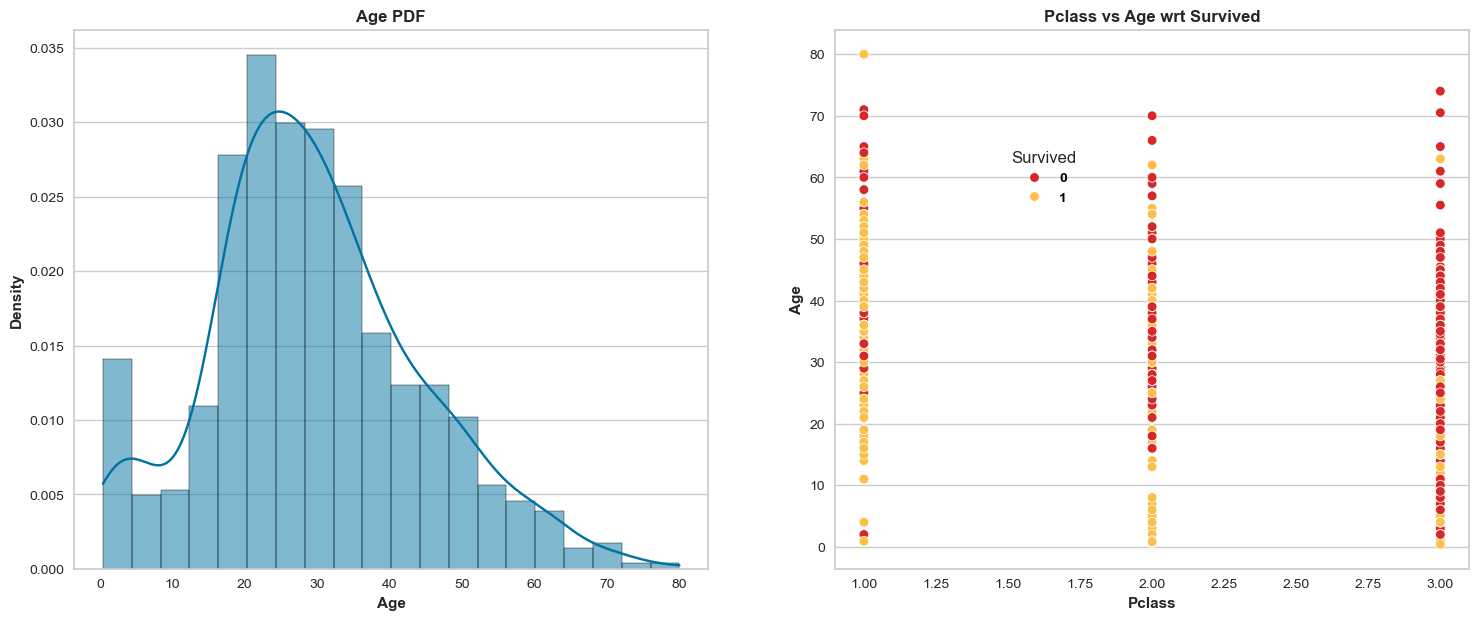

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

mean = df["Age"].mean()
mode = df["Age"].mode()
median = df["Age"].median()

sns.histplot(df["Age"], stat="density", kde=True, ax=axs[0])
axs[0].set_title("Age PDF", fontweight="bold")
axs[0].set_xlabel("Age", fontweight="bold")
axs[0].set_ylabel("Density", fontweight="bold")
l = axs[0].legend()
for text in l.get_texts():
    text.set_fontweight("bold")
    text.set_color("black")
axs[0].grid(axis="x")

sns.scatterplot(x=df["Pclass"], y=df["Age"], hue=df["Survived"], ax=axs[1],palette=["#d62828", "#fcbf49"])
axs[1].set_title("Pclass vs Age wrt Survived", fontweight="bold")
axs[1].set_xlabel("Pclass", fontweight="bold")
axs[1].set_ylabel("Age", fontweight="bold")
axs[1].grid(axis="x")
l = axs[1].legend(loc='upper right', bbox_to_anchor=(0.4, 0.8), title="Survived")
for text in l.get_texts():
    text.set_fontweight("bold")
    text.set_color("black")
plt.show()

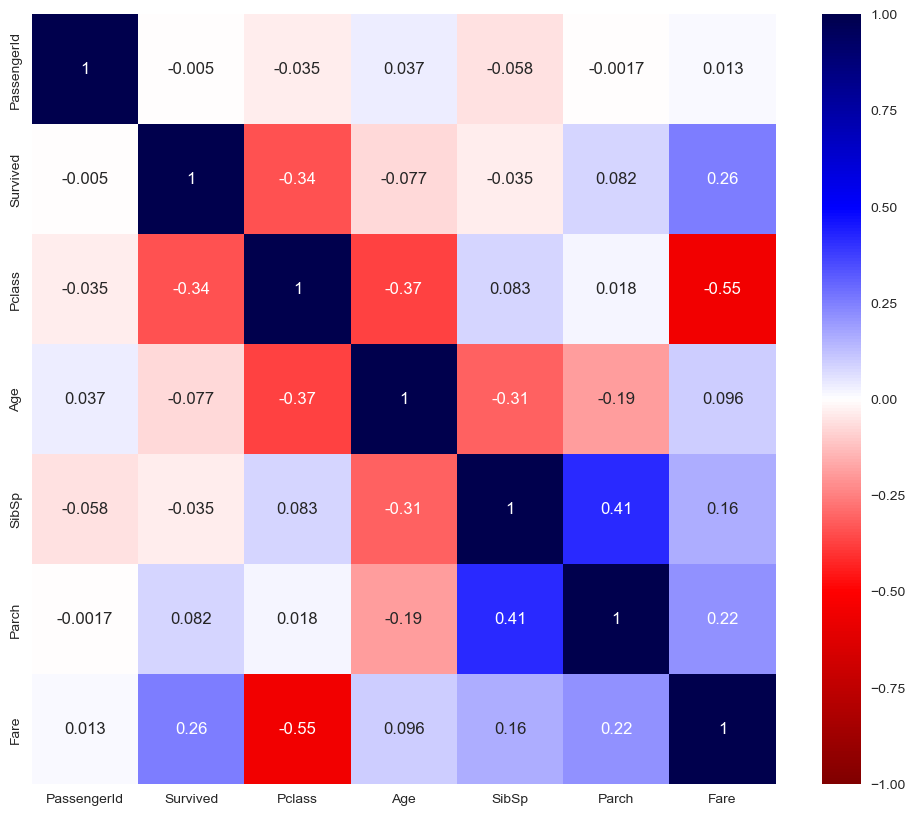

In [16]:
plt.figure(figsize=(12,10))
cor = df.corr(numeric_only=True)
sns.heatmap(cor, annot=True,
            cmap=plt.cm.seismic_r, vmin=-1, vmax=1)
plt.show()


# <p style="background-color:darkblue; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;">  Handling with Null Values </p>



<div class="alert alert-info" role="alert" style="background-color: lightgrey;">
  <h1>Column names removed: <span style="color:red">'PassengerId', 'Ticket', 'Cabin'</span></h1>
</div>

<div class="alert alert-block" style="background-color: purple;">
  <div class="alert alert-block alert-warning">
    <b>Operation:</b> The columns <span style="color:red; font-weight:bold">'PassengerId'</span>, <span style="color:red; font-weight:bold">'Ticket'</span>, and <span style="color:red; font-weight:bold">'Cabin'</span> are removed from the DataFrame using the <span style="color:red; font-weight:bold">drop</span> method.
  </div>
</div>


In [17]:
 df.drop(columns = ['PassengerId','Name',  'Ticket', 'Cabin'],axis =1, inplace= True)

In [18]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<div class="alert alert-info" role="alert" style="background-color: lightgrey;">
  <h1>Column name : <span style="color:red"> 'Embarked' </span></h1>
</div>

<div class="alert alert-block" style="background-color: purple;">
  <div class="alert alert-block alert-warning">
    <b>Operation:</b> The <span style="color:red; font-weight:bold">'Embarked'</span> column's missing values are imputed with the most frequent value using <span style="color:red; font-weight:bold">SimpleImputer</span>.
  </div>
</div>


In [19]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [20]:
from sklearn.impute import SimpleImputer

simple_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
simple_imp.fit(df[["Embarked"]])
df[["Embarked"]] = simple_imp.fit_transform(df[["Embarked"]])

In [21]:
df["Embarked"].isna().sum()

0

<div class="alert alert-info" role="alert" style="background-color: lightgrey;">
  <h1>Column name : <span style="color:red"> 'Age' </span></h1>
</div>

<div class="alert alert-block" style="background-color: purple;">
  <div class="alert alert-block alert-warning">
    <b>Operation:</b> The <span style="color:red; font-weight:bold">'Age'</span> column's missing values are imputed using the <span style="color:red; font-weight:bold">KNNImputer</span> with <span style="color:red; font-weight:bold">4 nearest neighbors</span> and <span style="color:red; font-weight:bold">uniform weights</span>.
  </div>
</div>


In [22]:
df['Age'].fillna(int(df['Age'].mean()), inplace=True)

In [23]:
from sklearn.impute import KNNImputer

KNN_imputer = KNNImputer(n_neighbors = 4)
df[["Age"]] = KNN_imputer.fit_transform(df[["Age"]])


In [24]:
df["Age"].isna().sum()

0

In [25]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:

def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 50:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

get_unique_values(df)

Column Name  Number of Unique Values         Unique Values  Data Type
0    Survived                        2                 [0, 1]     int64
1      Pclass                        3              [3, 1, 2]     int64
2         Sex                        2         [male, female]    object
3         Age                       88                      -   float64
4       SibSp                        7  [1, 0, 3, 4, 2, 5, 8]     int64
5       Parch                        7  [0, 1, 2, 5, 3, 4, 6]     int64
6        Fare                      248                      -   float64
7    Embarked                        3              [S, C, Q]    object

## Data Preparation

## Train | Test Split

## Modelling | Model Performance